# Assignment 4: CNN and ResNet


We first import all we need

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader 
from torch.utils.data import Subset 

import matplotlib.pyplot as plt
import numpy as np

import torchvision
import torchvision.datasets as DS
import torchvision.transforms as transforms

## Question 1: Making a Smaller Dataset from CIFAR-10
We first load CIFAR-10

In [2]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_set = DS.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_set = DS.CIFAR10(root='./data', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
print(len(train_set))
print(len(test_set))
print(train_set[0])
print(train_set[0][1])
print(train_set.class_to_idx)

50000
10000
(tensor([[[-0.5373, -0.6627, -0.6078,  ...,  0.2392,  0.1922,  0.1608],
         [-0.8745, -1.0000, -0.8588,  ..., -0.0353, -0.0667, -0.0431],
         [-0.8039, -0.8745, -0.6157,  ..., -0.0745, -0.0588, -0.1451],
         ...,
         [ 0.6314,  0.5765,  0.5529,  ...,  0.2549, -0.5608, -0.5843],
         [ 0.4118,  0.3569,  0.4588,  ...,  0.4431, -0.2392, -0.3490],
         [ 0.3882,  0.3176,  0.4039,  ...,  0.6941,  0.1843, -0.0353]],

        [[-0.5137, -0.6392, -0.6235,  ...,  0.0353, -0.0196, -0.0275],
         [-0.8431, -1.0000, -0.9373,  ..., -0.3098, -0.3490, -0.3176],
         [-0.8118, -0.9451, -0.7882,  ..., -0.3412, -0.3412, -0.4275],
         ...,
         [ 0.3333,  0.2000,  0.2627,  ...,  0.0431, -0.7569, -0.7333],
         [ 0.0902, -0.0353,  0.1294,  ...,  0.1608, -0.5137, -0.5843],
         [ 0.1294,  0.0118,  0.1137,  ...,  0.4431, -0.0745, -0.2784]],

        [[-0.5059, -0.6471, -0.6627,  ..., -0.1529, -0.2000, -0.1922],
         [-0.8431, -1.0000, -1.0

### Task 1: Play around with CIFAR-10
We can use the function below.

In [4]:
def imshow(img):
    # remove the impact of normalization
    img = img / 2 + 0.5
    npimg = img.numpy()
    
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

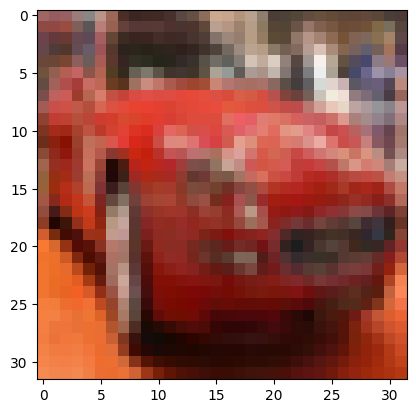

1


In [5]:
imshow(train_set[5][0])
print(train_set[5][1])

### Task 2: Make Training and Test Subsets
Extract a subset

In [6]:
def class_extract(cls_list, dataset):
    # initial values
    indx_set = []
    label_set = {}

    # we want later to rewrite the classes
    new_labels = {cls: i for i, cls in enumerate(cls_list)}
    #print(new_labels)
    # go through dataset and find points whose labels are in cls_list
    for indx, data in enumerate(dataset):
        if data[1] in cls_list: # if label is in cls_list
            indx_set.append(indx) # add index (target idx in original dataset) to indx_set
            label_set[indx] = new_labels[data[1]] # add new label to label_set

    print(indx_set)        
    print(label_set)
    # give data-points of the subset new label
    # for instance: we set now cat to class 0 and dog to class 1
    for indx in indx_set:
        dataset.targets[indx] = label_set[indx]

    
    subset = Subset(dataset, indx_set)
    return subset

We may now tray our implementation

In [7]:
cls_list = [3,5]
train_subset = class_extract(cls_list, train_set)
test_subset = class_extract(cls_list, test_set)



[9, 17, 21, 26, 27, 33, 36, 38, 39, 40, 51, 56, 59, 70, 74, 78, 80, 81, 83, 91, 101, 107, 128, 141, 142, 148, 150, 156, 157, 159, 167, 169, 173, 174, 177, 182, 183, 195, 197, 198, 203, 207, 215, 217, 229, 239, 241, 251, 253, 258, 260, 266, 277, 285, 287, 297, 305, 314, 315, 324, 331, 333, 334, 337, 339, 342, 359, 367, 370, 374, 377, 380, 384, 395, 416, 424, 426, 431, 445, 446, 450, 462, 471, 476, 479, 491, 494, 500, 515, 517, 534, 535, 542, 548, 550, 569, 573, 583, 597, 603, 607, 618, 624, 629, 638, 639, 653, 670, 675, 678, 681, 684, 685, 686, 691, 697, 702, 717, 726, 729, 730, 732, 734, 740, 750, 751, 762, 767, 774, 776, 784, 785, 788, 792, 801, 805, 806, 809, 813, 814, 817, 839, 845, 846, 850, 851, 852, 853, 857, 861, 865, 869, 875, 878, 882, 894, 895, 908, 918, 919, 922, 928, 932, 941, 944, 949, 955, 969, 981, 984, 988, 992, 993, 995, 996, 998, 999, 1002, 1010, 1015, 1025, 1030, 1033, 1041, 1048, 1055, 1057, 1059, 1061, 1066, 1070, 1072, 1074, 1076, 1081, 1088, 1091, 1093, 1096, 109

10000
2000


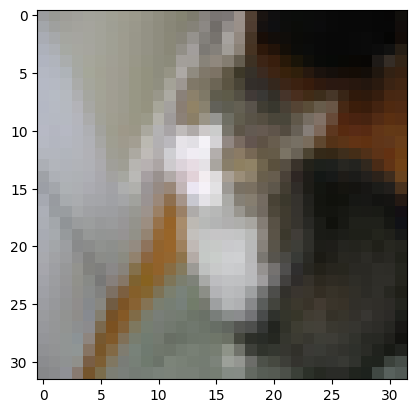

In [8]:
print(len(train_subset))
print(len(test_subset))
#print(train_subset[20])
imshow(train_subset[20][0])

## Observation

The labels of cat and dog in the subset are: 'cat': 3, 'dog': 5;
The size of training subsets is 10000 and the size of test subset is 2000

### Task 3: Load Training and Test Datasets as Mini-Batches
We now use the subsets to make our training and test datasets.

In [39]:
batch_size = 100
train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_subset, batch_size=batch_size, shuffle=True)

In [40]:
# Calculate the expected number of mini-batches
num_train_batches = len(train_subset) // batch_size + (len(train_subset) % batch_size != 0)
num_test_batches = len(test_subset) // batch_size + (len(test_subset) % batch_size != 0)

# Get the actual number of mini-batches
actual_num_train_batches = len(train_loader)
actual_num_test_batches = len(test_loader)

# Print and confirm the numbers
print(f'Expected number of training mini-batches: {num_train_batches}')
print(f'Actual number of training mini-batches: {actual_num_train_batches}')

print(f'Expected number of test mini-batches: {num_test_batches}')
print(f'Actual number of test mini-batches: {actual_num_test_batches}')


Expected number of training mini-batches: 100
Actual number of training mini-batches: 100
Expected number of test mini-batches: 20
Actual number of test mini-batches: 20


## Question 2: Implementing Plain CNN
Here is the diagram:

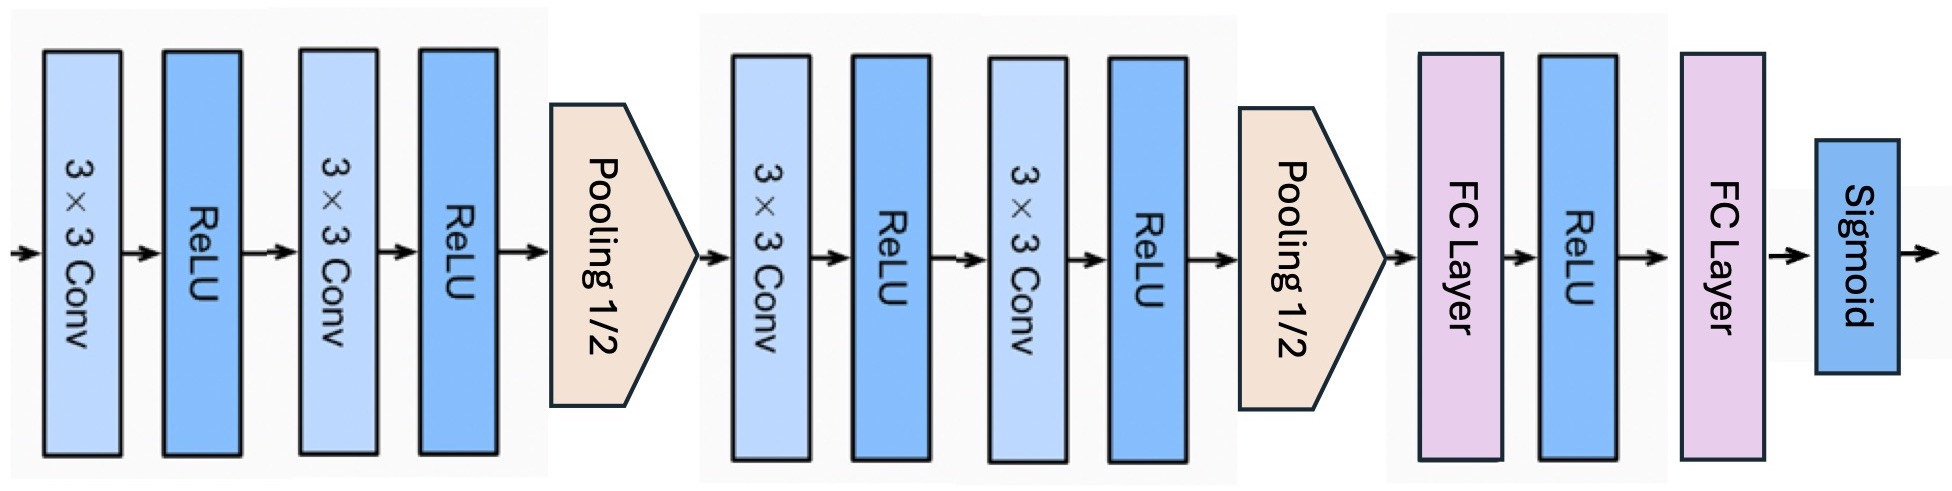

You may first try playing with `nn.Conv2d` and `nn.MaxPool2d`

### Task 1: Implementing the Plain CNN in Simple Form

In [41]:
class myCNN(nn.Module):
    def __init__(self):
        super(myCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1)
        self.relu2 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv4 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1)
        self.relu4 = nn.ReLU()
        self.conv5 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1)
        self.relu5 = nn.ReLU()
        self.pool6 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc7 = nn.Linear(in_features=64*5*5, out_features=128)
        self.relu7 = nn.ReLU()
        self.fc8 = nn.Linear(in_features=128, out_features=1)
        self.sigmoid8 = nn.Sigmoid()
    
    def forward(self, x):
        h = self.conv1(x)
        h = self.relu1(h)
        h = self.conv2(h)
        h = self.relu2(h)
        h = self.pool3(h)

        h = self.conv4(h)
        h = self.relu4(h)
        h = self.conv5(h)
        h = self.relu5(h)
        h = self.pool6(h)

        h = h.view(-1, 64*5*5)
        h = self.fc7(h)
        h = self.relu7(h)
        h = self.fc8(h)

        

        y = self.sigmoid8(h)
        return y

### Task 2: Implementing the Test Loop

In [42]:
def test(model, loss_function, device):
    # we first move our model to the configured device
    model = model.to(device = device)

    # we make sure we are not tracking gradient 
    # gradient is used in training, we do not need it for test
    with torch.no_grad():
        risk = 0
        accuracy = 0

        # loop over test mini-batches
        for i, (images, labels) in enumerate(test_loader): 
            # reshape labels to have the same form as output 
            # make sure labels are of torch.float32 type
            labels = labels.type(torch.float32)

            # move tensors to the configured device
            images = images.to(device = device)
            labels = labels.to(device = device)

            # forward pass
            outputs = model(images)
            loss = loss_function(outputs.squeeze(), labels)

            # determine the class of output from sigmoid output
            predicted = outputs >= 0.5

            # compute the fraction of correctly predicted labels
            correct_predict = (predicted.squeeze().long() == labels.long()).sum()

            risk += loss.item()
            accuracy += correct_predict.item()

        # average test risk and accuracy over the whole test dataset
        test_risk = risk / (i + 1)
        test_accuracy = accuracy / ((i + 1) * batch_size)

    return test_risk, test_accuracy

Now test your untrained model.

In [43]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = myCNN()
model = model.to(device = device)
test_risk, test_accuracy = test(model, nn.BCELoss(), device)

print(f'Initial test risk: {test_risk:.4f}')
print(f'Initial test accuracy: {test_accuracy:.4f}')

Initial test risk: 0.6937
Initial test accuracy: 0.5000


## Observation
The loss and accuracy of the untrained model are shown above. The result is not ideal beacuse we are using a raw model and simply doing the forward propagation.

### Task 3: Implementing Training Loop

In [44]:
from tqdm import tqdm

In [45]:
def train(model, num_epochs, device):
    # we first move our model to the configured device
    model = model.to(device = device)

    # set loss to binary CE
    loss_function = nn.BCELoss()

    # Set optimizer with optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    # Initiate the values
    train_risk = []
    test_risk = []
    test_accuracy = []

    for epoch in tqdm(range(num_epochs), unit="epoch"):
        # training risk in one epoch
        risk = 0

        # loop over training data
        for i, (images, labels) in enumerate(train_loader):  

            # reshape labels to have the same form as output 
            # make sure labels are of torch.float32 type
            labels = labels.type(torch.float32)

            # move tensors to the configured device
            images = images.to(device = device)
            labels = labels.to(device = device)

            # forward pass
            outputs = model(images)
            loss = loss_function(outputs.squeeze(), labels)

            # collect the training loss
            risk += loss.item()

            # backward pass
            optimizer.zero_grad()
            # complete: compute the gradient of loss 
            loss.backward()

            # one step of gradient descent
            optimizer.step()

            # test out model after update by the optimizer
            risk_epoch, accuracy_epoch = test(model, nn.BCELoss(), device)

        # collect losses and accuracy
        train_risk.append(risk/i)
        test_risk.append(risk_epoch)
        test_accuracy.append(accuracy_epoch)

        # we can print a message every second epoch
        if (epoch+1) % 2 == 0:
            print(f"Epoch [{epoch + 1}/{num_epochs}], Training Loss: {risk / (i + 1):.4f}, Test Loss: {risk_epoch:.4f}, Test Accuracy: {accuracy_epoch:.4f}")


    # plot the losses
    plt.figure(figsize=(10, 6))
    plt.plot(train_risk, label='Training Loss')
    plt.plot(test_risk, label='Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Test Loss Over Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()

    # plot the accuracy
    plt.figure(figsize=(10, 6))
    plt.plot(test_accuracy, label='Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()


    return train_risk, test_risk, test_accuracy

Now, we can train

 20%|██        | 2/10 [00:55<03:39, 27.49s/epoch]

Epoch [2/10], Training Loss: 0.5988, Test Loss: 0.5657, Test Accuracy: 0.6925


 40%|████      | 4/10 [01:47<02:40, 26.68s/epoch]

Epoch [4/10], Training Loss: 0.4959, Test Loss: 0.4820, Test Accuracy: 0.7655


 60%|██████    | 6/10 [02:37<01:42, 25.71s/epoch]

Epoch [6/10], Training Loss: 0.4254, Test Loss: 0.4638, Test Accuracy: 0.7760


 80%|████████  | 8/10 [03:33<00:53, 26.97s/epoch]

Epoch [8/10], Training Loss: 0.3600, Test Loss: 0.4201, Test Accuracy: 0.8115


100%|██████████| 10/10 [04:30<00:00, 27.07s/epoch]

Epoch [10/10], Training Loss: 0.2903, Test Loss: 0.4629, Test Accuracy: 0.8000


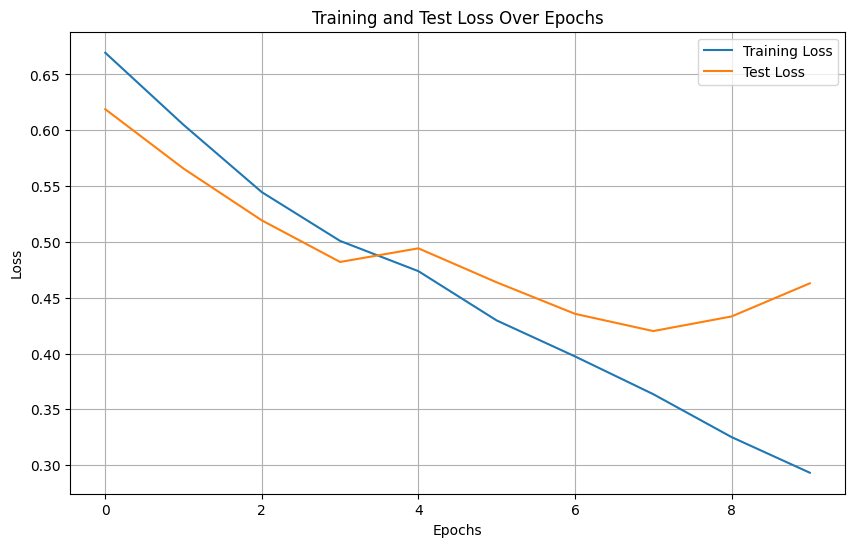

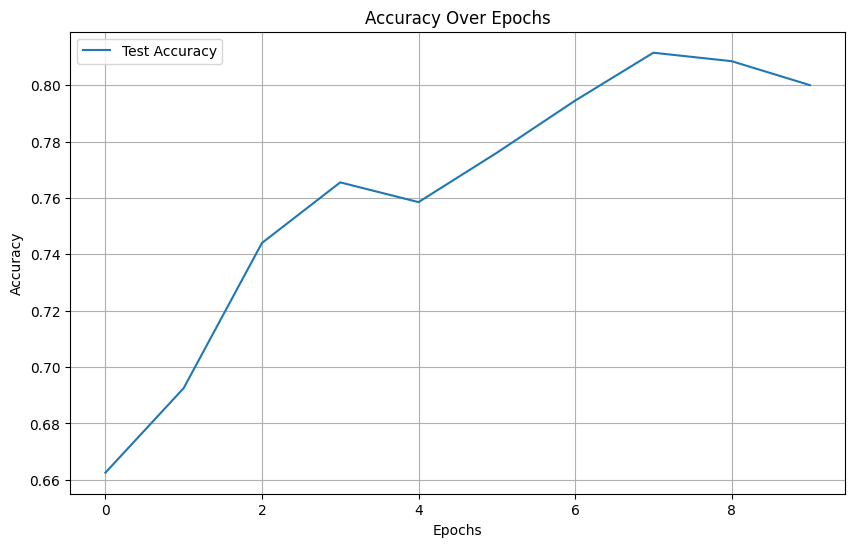

In [46]:
model = myCNN()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_risk, train_risk, test_accuracy = train(model, 10, device)

## Observation
From the result above we could conclude that with the training processing the results tend to be better. However, when the epochs increase the model seems to counter the overfitting issues which decreases the accuracy.

### Task 4: Dropout and Batch Normalization
For this task you may copy class `myCNN` into this new class `myCNN_revised` and continue.

In [47]:
class myCNN_revised(nn.Module):
    def __init__(self):
        super(myCNN_revised, self).__init__()
        self.dropout1 = nn.Dropout2d(p=0.2)
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1)
        self.relu1 = nn.ReLU()
        self.BN1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1)
        self.relu2 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.dropout4 = nn.Dropout2d(p=0.3)
        self.conv4 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1)
        self.relu4 = nn.ReLU()
        self.BN4 = nn.BatchNorm2d(64)
        self.conv5 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1)
        self.relu5 = nn.ReLU()
        self.pool6 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.dropout7 = nn.Dropout(p=0.4)
        self.fc7 = nn.Linear(in_features=64*5*5, out_features=128)    
        self.relu7 = nn.ReLU()
        self.BN7 = nn.BatchNorm1d(128)

        self.fc8 = nn.Linear(in_features=128, out_features=1)
        self.sigmoid8 = nn.Sigmoid()
    
    def forward(self, x):
        h = self.dropout1(x)
        h = self.conv1(h)
        h = self.relu1(h)
        h = self.BN1(h)
        h = self.conv2(h)
        h = self.relu2(h)
        h = self.pool3(h)

        h = self.dropout4(h)
        h = self.conv4(h)
        h = self.relu4(h)
        h = self.BN4(h)
        h = self.conv5(h)
        h = self.relu5(h)
        h = self.pool6(h)

        h = h.view(-1, 64*5*5)
        h = self.dropout7(h)
        h = self.fc7(h)
        h = self.relu7(h)
        h = self.BN7(h)
        h = self.fc8(h)

        

        y = self.sigmoid8(h)
        return y

Repeat the training now

  0%|          | 0/20 [00:00<?, ?epoch/s]

 10%|█         | 2/20 [01:00<09:02, 30.15s/epoch]

Epoch [2/20], Training Loss: 0.6463, Test Loss: 0.6432, Test Accuracy: 0.6230


 20%|██        | 4/20 [02:00<08:03, 30.20s/epoch]

Epoch [4/20], Training Loss: 0.6145, Test Loss: 0.6034, Test Accuracy: 0.6755


 30%|███       | 6/20 [03:00<07:01, 30.13s/epoch]

Epoch [6/20], Training Loss: 0.5758, Test Loss: 0.5792, Test Accuracy: 0.6950


 40%|████      | 8/20 [04:00<05:59, 29.95s/epoch]

Epoch [8/20], Training Loss: 0.5425, Test Loss: 0.5362, Test Accuracy: 0.7205


 50%|█████     | 10/20 [04:59<04:56, 29.69s/epoch]

Epoch [10/20], Training Loss: 0.5186, Test Loss: 0.5414, Test Accuracy: 0.7325


 60%|██████    | 12/20 [05:58<03:57, 29.66s/epoch]

Epoch [12/20], Training Loss: 0.4918, Test Loss: 0.5154, Test Accuracy: 0.7350


 70%|███████   | 14/20 [06:58<02:58, 29.74s/epoch]

Epoch [14/20], Training Loss: 0.4602, Test Loss: 0.4828, Test Accuracy: 0.7595


 80%|████████  | 16/20 [07:57<01:58, 29.73s/epoch]

Epoch [16/20], Training Loss: 0.4427, Test Loss: 0.4944, Test Accuracy: 0.7515


 90%|█████████ | 18/20 [08:49<00:55, 27.77s/epoch]

Epoch [18/20], Training Loss: 0.4140, Test Loss: 0.4747, Test Accuracy: 0.7635


100%|██████████| 20/20 [09:39<00:00, 28.98s/epoch]

Epoch [20/20], Training Loss: 0.3897, Test Loss: 0.5060, Test Accuracy: 0.7540


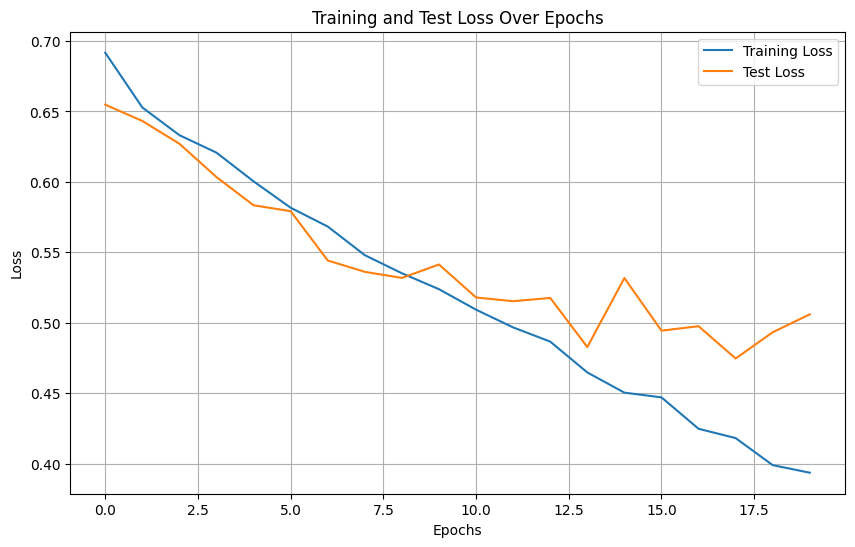

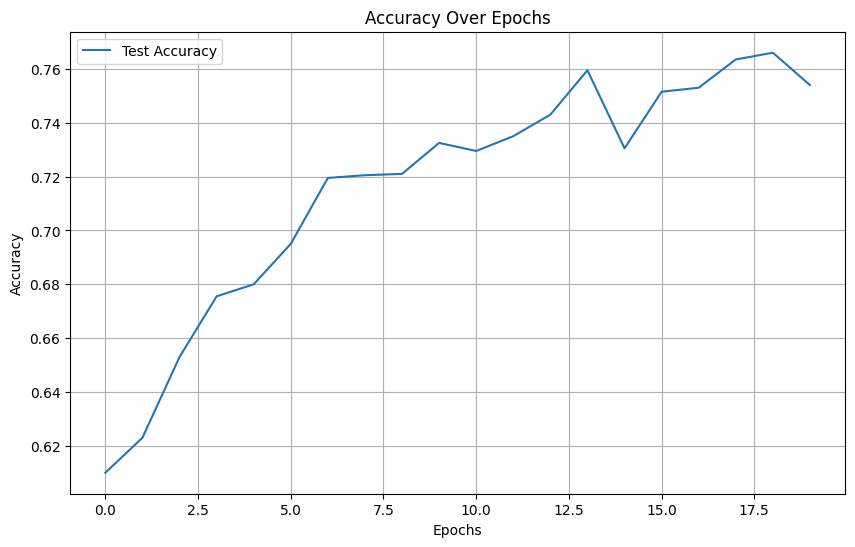

In [48]:
model_revised = myCNN_revised()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_risk, train_risk, test_accuracy = train(model_revised, 20, device)

## Observation
Due to the implementation of dropout and batch normalization, the overfitting issue is relieved. However, the accuracy of the model tends to decrease at the end of the 20th epochs.

## Question 3: Implementing CNN with Skip Connection
Here is the diagram:

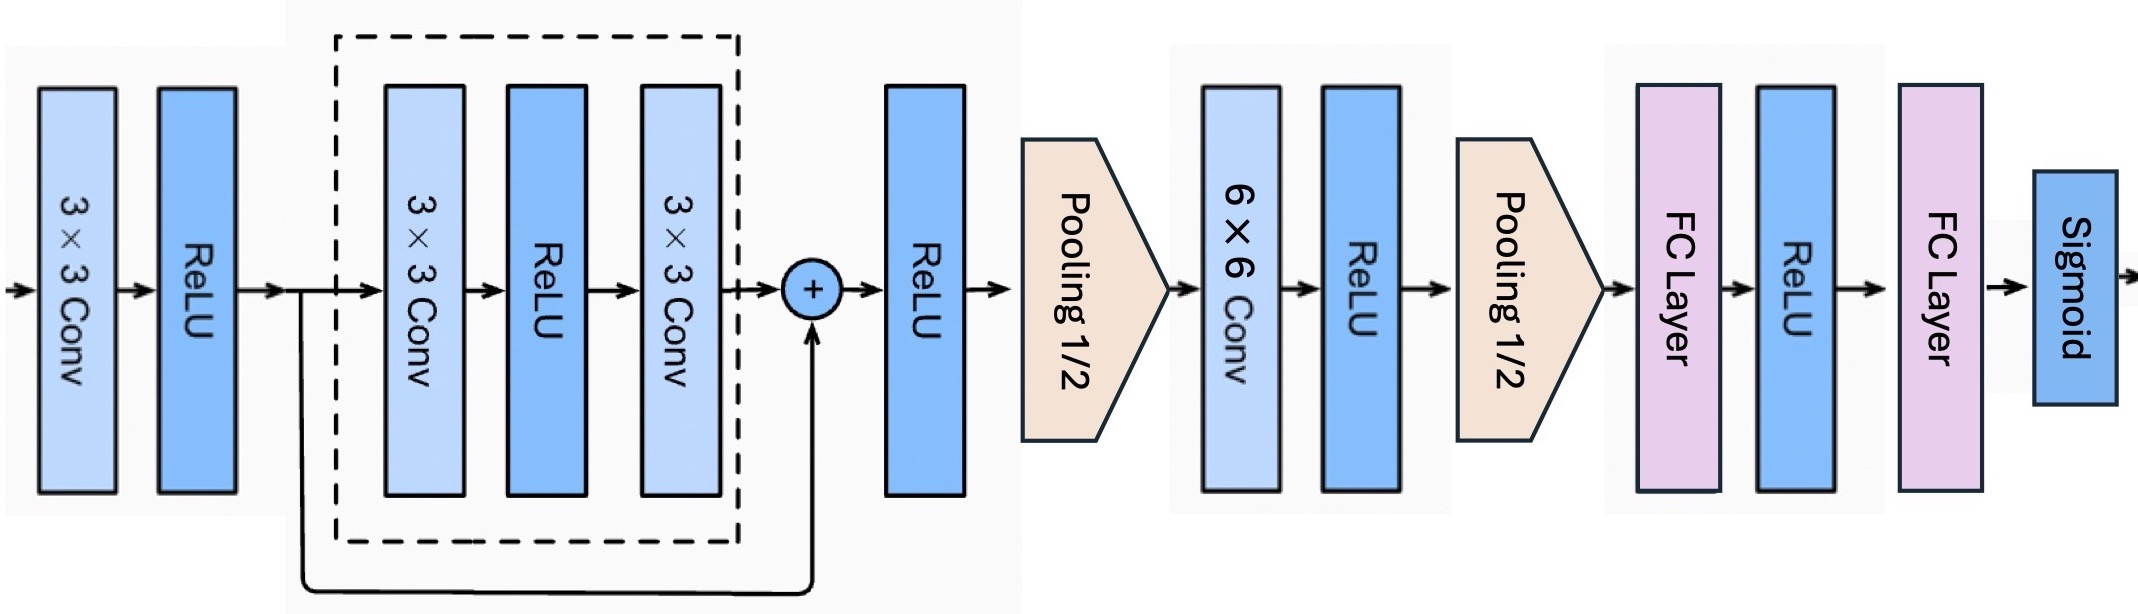

Note that you __only__ need to implement a new model. The test and training loops can be already used from previous question.

### Task 1: Implement the Model
Pay attention to the skip connection. The rest is the same as the plain CNN.

In [49]:
class myResNet(nn.Module):
    def __init__(self):
        super(myResNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1)
        self.relu1 = nn.ReLU()

        self.conv2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()

        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv5 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=6, stride=1) 
        self.relu5 = nn.ReLU()

        self.pool6 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc7 = nn.Linear(in_features=64*5*5, out_features=128)
        self.relu7 = nn.ReLU()
        self.fc8 = nn.Linear(in_features=128, out_features=1)
        self.sigmoid8 = nn.Sigmoid()
        
    def forward(self, x):
        # input to the residual unit
        h_in = self.relu1(self.conv1(x))
        h = self.relu2(self.conv2(h_in))
        h = self.conv3(h)


        h = h + h_in
        
        h = self.relu3(h)
        h = self.pool4(h)
        h = self.relu5(self.conv5(h))
        h = self.pool6(h)
        
        h = h.reshape(-1, 64*5*5)
        
        h = self.relu7(self.fc7(h))
        h = self.fc8(h)
        


        y = self.sigmoid8(h)
        return y

### Task 2: Training our ResNet
You may just complete the following line.

 10%|█         | 2/20 [00:52<07:50, 26.16s/epoch]

Epoch [2/20], Training Loss: 0.5889, Test Loss: 0.5748, Test Accuracy: 0.6995


 20%|██        | 4/20 [01:44<06:59, 26.24s/epoch]

Epoch [4/20], Training Loss: 0.4851, Test Loss: 0.4810, Test Accuracy: 0.7590


 30%|███       | 6/20 [02:35<06:01, 25.80s/epoch]

Epoch [6/20], Training Loss: 0.3877, Test Loss: 0.4524, Test Accuracy: 0.7795


 40%|████      | 8/20 [03:26<05:07, 25.61s/epoch]

Epoch [8/20], Training Loss: 0.3134, Test Loss: 0.4854, Test Accuracy: 0.7810


 50%|█████     | 10/20 [04:22<04:29, 26.92s/epoch]

Epoch [10/20], Training Loss: 0.2248, Test Loss: 0.5687, Test Accuracy: 0.7755


 60%|██████    | 12/20 [05:18<03:37, 27.18s/epoch]

Epoch [12/20], Training Loss: 0.1495, Test Loss: 0.6510, Test Accuracy: 0.7750


 70%|███████   | 14/20 [06:13<02:46, 27.76s/epoch]

Epoch [14/20], Training Loss: 0.0889, Test Loss: 0.8718, Test Accuracy: 0.7710


 80%|████████  | 16/20 [07:20<02:01, 30.47s/epoch]

Epoch [16/20], Training Loss: 0.0606, Test Loss: 1.0453, Test Accuracy: 0.7680


 90%|█████████ | 18/20 [08:28<01:05, 32.53s/epoch]

Epoch [18/20], Training Loss: 0.0494, Test Loss: 1.0814, Test Accuracy: 0.7630


100%|██████████| 20/20 [09:45<00:00, 29.30s/epoch]

Epoch [20/20], Training Loss: 0.0257, Test Loss: 1.5353, Test Accuracy: 0.7620


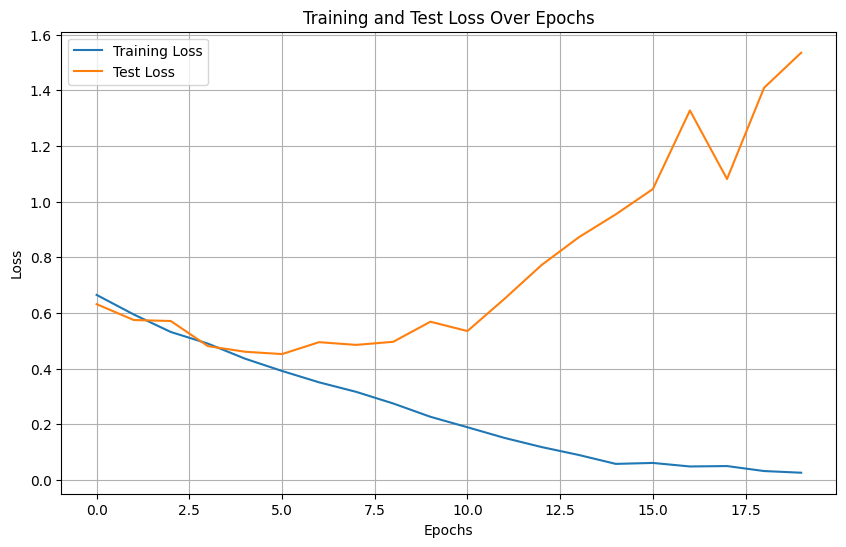

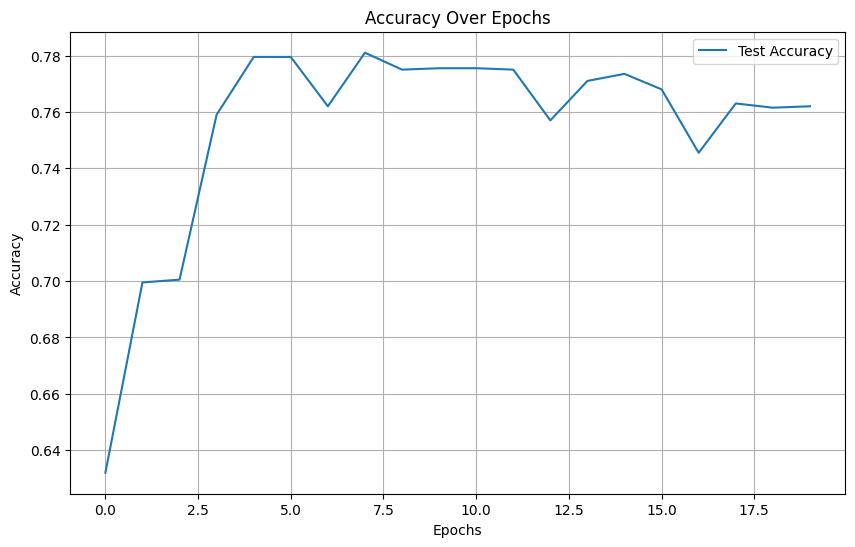

In [50]:
model_resnet = myResNet()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_risk, train_risk, test_accuracy = train(model_resnet, 20, device)

## Observation
After applying the skip connection techniques, the performance of the model tends to be slightly better. However, the overfitting issue remains when the number of epochs increase.

### Task 3: Batch Normalization
Copy class `myResNet` into the class `myResNet_withBN` and apply the modifications.

In [51]:
class myResNet_BN(nn.Module):
    def __init__(self):
        super(myResNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1)
        self.relu1 = nn.ReLU()
        self.BN1 = nn.BatchNorm2d(32)

        self.conv2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.BN2 = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.BN3 = nn.BatchNorm2d(32)

        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv5 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=6, stride=1) 
        self.relu5 = nn.ReLU()
        self.BN5 = nn.BatchNorm2d(64)

        self.pool6 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc7 = nn.Linear(in_features=64*5*5, out_features=128)
        self.relu7 = nn.ReLU()
        self.BN7 = nn.BatchNorm1d(128)
        self.fc8 = nn.Linear(in_features=128, out_features=1)
        self.sigmoid8 = nn.Sigmoid()
        
    def forward(self, x):
        # input to the residual unit
        h_in = self.relu1(self.conv1(x))
        h = self.BN1(h_in)
        h = self.relu2(self.conv2(h_in))
        h = self.BN2(h)
        h = self.conv3(h)
        h = h + h_in
        h = self.relu3(h)
        h = self.BN3(h)
        h = self.pool4(h)
        h = self.relu5(self.conv5(h))
        h = self.BN5(h)
        h = self.pool6(h)
        h = h.view(-1, 64*5*5)
        h = self.relu7(self.fc7(h))
        h = self.fc8(h)



        y = self.sigmoid8(h)
        return y

Now, repeat the training.

  0%|          | 0/20 [00:00<?, ?epoch/s]

 10%|█         | 2/20 [02:30<23:03, 76.84s/epoch]

Epoch [2/20], Training Loss: 0.5917, Test Loss: 0.5986, Test Accuracy: 0.6630


 20%|██        | 4/20 [05:32<23:07, 86.73s/epoch]

Epoch [4/20], Training Loss: 0.4874, Test Loss: 0.4796, Test Accuracy: 0.7600


 30%|███       | 6/20 [07:09<14:39, 62.84s/epoch]

Epoch [6/20], Training Loss: 0.4107, Test Loss: 0.4619, Test Accuracy: 0.7700


 40%|████      | 8/20 [08:10<09:04, 45.36s/epoch]

Epoch [8/20], Training Loss: 0.3385, Test Loss: 0.4610, Test Accuracy: 0.7675


 50%|█████     | 10/20 [09:12<06:18, 37.85s/epoch]

Epoch [10/20], Training Loss: 0.2663, Test Loss: 0.4811, Test Accuracy: 0.7885


 60%|██████    | 12/20 [10:18<04:43, 35.48s/epoch]

Epoch [12/20], Training Loss: 0.1640, Test Loss: 0.5924, Test Accuracy: 0.7815


 70%|███████   | 14/20 [11:16<03:14, 32.41s/epoch]

Epoch [14/20], Training Loss: 0.0781, Test Loss: 0.8397, Test Accuracy: 0.7800


 80%|████████  | 16/20 [12:21<02:09, 32.35s/epoch]

Epoch [16/20], Training Loss: 0.0652, Test Loss: 0.9800, Test Accuracy: 0.7685


 90%|█████████ | 18/20 [13:30<01:07, 33.72s/epoch]

Epoch [18/20], Training Loss: 0.0268, Test Loss: 1.3259, Test Accuracy: 0.7695


100%|██████████| 20/20 [14:40<00:00, 44.04s/epoch]

Epoch [20/20], Training Loss: 0.0162, Test Loss: 1.6917, Test Accuracy: 0.7770


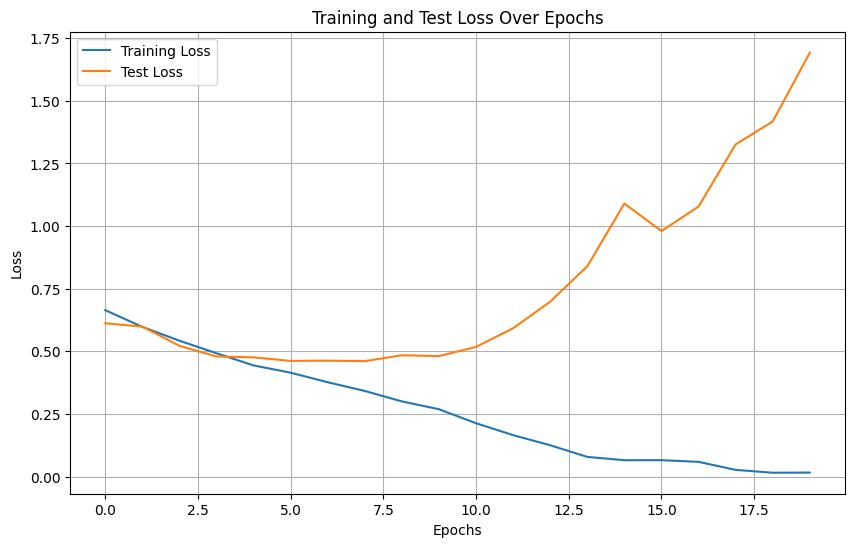

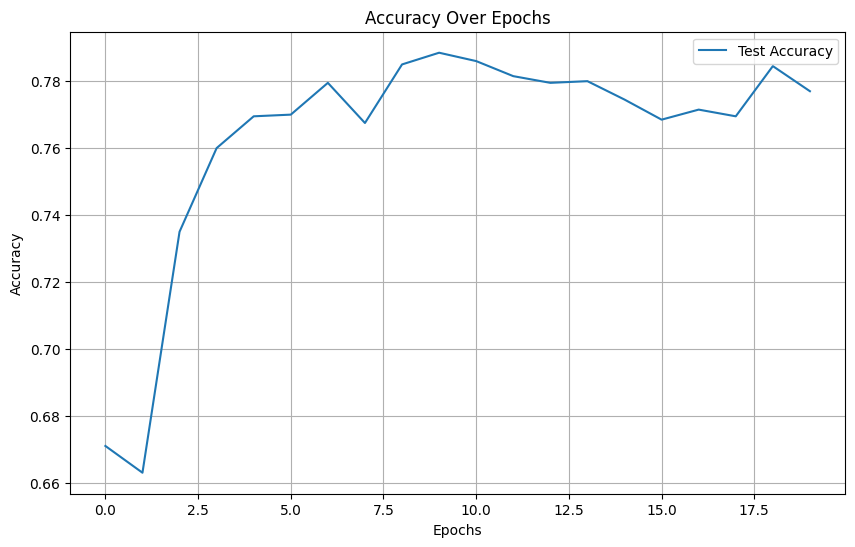

In [52]:
model_resnet_BN = myResNet()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_risk, train_risk, test_accuracy = train(model_resnet_BN, 20, device)

## Observation
Though the performance is slightly better, it is inferred that we will need to introduce dropout as well as batch normalization to relieve the overfitting issues.

# Well done! 